# Profitable App Profiles for the iOS and Google Play Markets

## Introduction

Collecting data from different app stores provides an avenue for app-building businesses to make data-driven decisions. Success ultimately comes from the ability of developers to draw insights that them help capture target consumers in both the android and iOS markets.

For this project, we will assume that we are working as data analysts for a company that builds mobile Android and iOS apps. The company only builds apps that are free to download and install, and revenue is mainly from in-app ads. Thus, the more the number of users who see and engage with these ads, the better the revenue stream. **Our goal is to analyze data to help our developers understand what type of apps are likely to attract more users**.

## Dataset Selection

As of September 2018, there were approximately **2 million** iOS apps available on the App Store, and **2.1 million** Android apps on Google Play.

![](https://s3.amazonaws.com/dq-content/350/py1m8_statista.png)
You can also find more information about this report at Statista: [Number of apps available in leading app stores](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting information for Android and iOS apps (over 4 million apps) would require a significant amount of time, effort and money. To avoid spending resources on collecting new data ourselves, We will try to analyze a sample of the data instead. Luckily, there are two data sets that can help us analyze some relevant existing data at no cost:

### Useful Datasets

- [A dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from [here](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
- [A dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from [here](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

## Importing Useful Libraries
During the course of this project, we will need to read files and create visualizations. For these purposes, we will import the `reader` (for reading files) then plotly's `make_subplots` and `graph_objects` (for creating visualizations):

In [1]:
from csv import reader
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Opening and Exploring the data

We will start by opening and exploring and the two datasets we have selected:

To make things easier, we will create a function named `extract_data()`. This function will take a file path as its argument, read the file, then return the resulting dataset as a list of lists.

In [2]:
def extract_data(filename):
    """reads file using filename url, then returns a list of lists"""
    
    opened_file = open(filename)
    read_file = reader(opened_file)
    result = list(read_file)
    return result[0], result[1:]

For easy exploration, we will also create another function called `explore_data()`. This function will be used to display dataset rows in readable format

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    """
    Displays dataset rows in readable format
  
    Parameters:
    dataset (list): a list of lists
    start (int): start index for dataset slice
    end (int): end index for dataset slice
    rows and columns (boolean): specifies whether to return rows and columns.
    
    output:
    prints the sliced dataset rows
    prints the number of dataset rows and columns if rows_and_columns is true
  
    """
    
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Let's open and explore the Google App store dataset using the functions we created.

In [4]:
# reading and extracting the dataset header and data
google_header, google = extract_data('googleplaystore.csv')

# exploring the dataset
print(google_header, '\n')
explore_data(google,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


We see that the Google App store dataset contains **10841 rows** and **13 columns**. At first glance, we can see that the following columns will be useful to consider in our analysis `'App'`, `'Category'`, `'Reviews'`, `'Installs'`, `'Type'`, `'Price'`, and `'Genres'`.

Now, we will repeat the same process to understand the iOS store Dataset

In [5]:
# reading and extracting the dataset header and data
apple_header, apple = extract_data('AppleStore.csv')

# exploring the dataset
print(apple_header, '\n')
explore_data(apple,0,3,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


This iOS dataset comprises **7197 rows**, and **16 columns**. The following columns will aid our analysis: `'track_name'`, `'currency'`, `'price'`, `'rating_count_tot'`, `'rating_count_ver'`, and `'prime_genre'`.

Some of these column names are not self explanatory like the google app store columns. However, you can find sufficient information about each individual column [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home)

## Preparing the data for analysis

Before beginning our analysis, we need to make sure the data we analyze is accurate and relevant to our objectives. To avoid erroneous conclusions, it is advisable to carry out the following steps:

**Ensure accuracy**
1. Detect inaccurate data, and correct or remove them.
2. Detect duplicate data, and remove the duplicates.

**Ensure relevance**

Recall that at our company only builds apps that are **free** to download and install, and we design them for an **English-speaking** audience. This means that we'll need to do the following:

1. Remove the non-English apps.
2. Remove all apps that aren't free


## 1. Dealing with Innacurate Data
Let's begin by detecting and deleting wrong or innacurate data. To do this we'd define a function called `detect_error()`. This takes a dataset and its header as an argument, then prints any row with incomplete data from the dataset alongside its index.

In [6]:
def detect_error(dataset, header):
    """Returns the indices of rows in the dataset that do not match the header row in length"""
    
    for row in dataset:
        if len(row) != len(header):
            print(header,'\n')
            print(row, '\n')
            print('The index of the erroneous row is: {}'.format(dataset.index(row)))

Next we'd check the Google App store dataset for inaccurate entries

In [7]:
detect_error(google,google_header)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up'] 

The index of the erroneous row is: 10472


The erroneous row `10472` has one less column than the header row. This signifies that the entry for one column is missing from this record. We can also see that the `Category` value for this row is `'1.9'`. This value can never be a valid category for a google store app. 

#### Deleting inacurate data
The dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) for this dataset has also outlined this problem. To ensure the accuracy of our analysis we will delete this row using Python's built-in `del` function

In [8]:
print(len(google)) # check the number of records before deleting

del google[10472]  # we need to be careful to run this only once

print(len(google)) # this should be one lesser than the records before deleting

10841
10840


Next we'd check the iOS store dataset for inaccurate entries

In [9]:
detect_error(apple,apple_header)

The function returns no result because the all the column entries are complete for the iOS App dataset 

## 2. Identifying Duplicates

To ensure that there are no duplicates in our dataset we will define the function `count_duplicates()`. This takes the dataset as an argument and returns the number of duplicate records.

Another function `print_duplicates()` allows us to see all the entries for a particular duplicate app. 

Let's define these functions:

In [10]:
def count_duplicates(dataset):
    """ Prints the total number of dupicate records in a given dataset """
    
    unique = []
    duplicates = {}
    
    for row in dataset:
        app = row[0]
        if app in unique:
            if app in duplicates:
                duplicates[app] += 1
            else:
                duplicates[app] = 1
        else:
            unique.append(app)
        
    result = sum(duplicates.values()) #collates the total number of duplicate occurences

    if result == 0:
        print('There are no duplicates here')
    else:
        print(result)

def print_duplicates(dataset,item,index=0):
    """
    Parameters:
    dataset (list): The dataset of interest.
    item (str): The entry for which duplicates are printed.
    index (int): location of item in dataset row.
    
    Result:
    prints all duplicates of the given item in the dataset
  
    """
    for row in dataset:
        if row[index] == item:
            print(row)

We will now check for duplicates in the Google App store dataset:

In [11]:
count_duplicates(google)

1181


In total, there are **1,181 cases** where an app occurs more than once. We can view these duplicates using `print_duplicates()`. In this case we will examine the duplicate entries for `'WeChat'` and `'Instagram'` below:

In [12]:
print(google_header)
print('\n')
print_duplicates(google, 'WeChat')
print('\n')
print_duplicates(google, 'Instagram')

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['WeChat', 'COMMUNICATION', '4.2', '5387333', 'Varies with device', '100,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 31, 2018', 'Varies with device', 'Varies with device']
['WeChat', 'COMMUNICATION', '4.2', '5387446', 'Varies with device', '100,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 31, 2018', 'Varies with device', 'Varies with device']
['WeChat', 'COMMUNICATION', '4.2', '5387446', 'Varies with device', '100,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 31, 2018', 'Varies with device', 'Varies with device']
['WeChat', 'COMMUNICATION', '4.2', '5387631', 'Varies with device', '100,000,000+', 'Free', '0', 'Everyone', 'Communication', 'July 31, 2018', 'Varies with device', 'Varies with device']


['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 

Now lets check the iOS dataset for duplicates:

In [13]:
count_duplicates(apple)

There are no duplicates here


We can see that Although we have a lot of duplicate reocods in the google App store dataset, there are no duplicates in the iOS dataset. We do not want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If we examine the rows we printed for the `WeChat` and `Instagram` apps, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times with the most recent collection having the highest reviews.

#### Removing duplicate data

After we examined the Google Play dataset, we observed that there are **1,181** duplicates. Since the lenght of this dataset is **10,840** rows. We should be left with `10,840 - 1,181` = `9,659` rows after we remove the duplicates:

In [14]:
print('Dataset length without duplicates:', len(google) - 1181)

Dataset length without duplicates: 9659


To remove the duplicates, we will:

- Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
- Use the information stored in the dictionary to create a new dataset, which will have only one entry per app. For each app, we'll only select the entry with the highest number of reviews.

Let's create the dictionary:

In [15]:
unique_apps = {} # dictionary that will hold the unique app name and highest review value

for row in google:
    app_name = row[0]
    reviews = int(row[3])
    
    if app_name not in unique_apps:
        unique_apps[app_name] = reviews
    elif app_name in unique_apps and (unique_apps[app_name] < reviews):
        unique_apps[app_name] = reviews
        
# Check the length of the unique_apps dictionary
print('The length of the unique apps dictionary is: ',len(unique_apps.values()))

The length of the unique apps dictionary is:  9659


Note that the length of the dictionary is exactly `9,659` which was what we estimated that the google app store dataset would have if there were no duplicates.

Now, we'll use the information stored in the unique_apps dictionary and create a new dataset that does not have duplicate entries. To do this we will:

- Start by creating two empty lists: `google_clean` (which will store our new cleaned data set) and `already_added` (which will keep track of the app names that are added to google clean).
- Loop through the Google Play dataset, and for each iteration, we will:
    - Assign the app name to a variable named `app_name`.
    - Convert the number of reviews to an integer, and assign it to a variable named `n_reviews`

Finally we will add the current row to `google_clean`, and the app name to `already_added` if:
- The number of reviews of the current app matches the number of reviews of that app as described in the `unique_apps` dictionary *and*
- The name of the app is not already in the already_added list. 
    
We need to add the second condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for `unique_apps[app_name]` == `n_reviews`, we will still end up with duplicate entries for some apps.

In [16]:
google_clean = []
already_added = []

for row in google:
    
    app_name = row[0]
    n_reviews = int(row[3])
    
    if (unique_apps[app_name] == n_reviews) and (app_name not in already_added):
        google_clean.append(row)
        already_added.append(app_name)

Now let's check the length of the `google_clean` list to be sure it contains exactly `9,659` data rows

In [17]:
print('The length of google_clean is: ', len(google_clean))

The length of google_clean is:  9659


## 3. Removing Non-English apps

Since we only intend to develop English apps. We will like to analyze only the apps that are designed for an English-speaking audience. Therefore, we'll check both datasets for app names that suggest they are not designed for an English-speaking audience. If we find any of such entries, we will remove them.

Our criteria will be screening for app names that contain characters that are out of the `ASCII` range. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters that fall outside the ASCII range. Will build a function called `is_english()` to help us perform this screening excercise:

In [18]:
def is_english(string):
    counter = 0
    
    for char in string:
        
        if ord(char) > 127: # ASCII range spans between 0 - 127
            counter += 1
            
        if counter > 3: # create permision for up to 3 non-ASCII characters
            return False
        
    return True

This means all English apps with up to three emoji or other special characters will still be labeled as English. Our criteria is not perfect, but it should be fairly effective for identifying the apps we want. We will build another function called `extract_english()` that goes through a dataset and returns only the English apps.

In [19]:
def extract_english(dataset, index=0):
    result = []
    
    for row in dataset:
        app_name = row[index]
        
        if is_english(app_name):
            result.append(row)
    return result

Let's extract the English apps from the `google_clean` and `apple` data into variables named `google_eng` and `apple_eng` respectively. We will also use `explore_data()` to preview our results.

In [20]:
google_eng = extract_english(google_clean)
apple_eng = extract_english(apple, 1)

explore_data(google_eng,0,3,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


In [21]:
explore_data(apple_eng,0,3,True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 6183
Number of columns: 16


After removing the Non-English Apps we are left with **9,614** rows of Google App Store data and **6,183** row of iOS App data

## 4. Removing Paid Apps

We only build apps that are **free** to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

First we will define a function called `extract_free()` that extracts the free apps by taking a dataset and the column index for `price` as an argument. This function will also print the number of extracted rows.

In [22]:
def extract_free(dataset, index):
    """
    Parameters:
    dataset (list): The dataset of interest.
    index (int): location of price info in the dataset row.
    
    Output:
    extracts the free apps into a list of lists
    prints the number of records in the resulting list of lists
  
    """
    
    result = []
    
    for row in dataset:
        price = row[index]
        if price == '0' or price =='0.0':
            result.append(row)
            
    print(len(result))    
    return result

Then, we will extract the free google play and iOS apps into `google_free` and `apple_free` respectively

In [23]:
google_free, apple_free = extract_free(google_eng, 7), extract_free(apple_eng, 4)

8864
3222


This leaves us with **8,864** records from the google play dataset and **3,222** records from the iOS store dataset.

## Analysis

To recall, our goal is to determine the kinds of apps that are likely to attract more users. The more the number of people using our apps, the more our revenue. **It would also be advisable to select app profiles that allow us maximize the potential for advertising**.

A profile that is successful in both the Android and IOS markets will provide more avenues for expansion in the future.

We'll begin the analysis by determining the most common app genres for each market. For this, we'll build frequency tables for the `prime_genre` column of the iOS data set, and for the `Genres` and `Category` columns of the google store data set

### We need three functions to help us compute and visualize these frequency tables
- One function to generate frequency tables that show percentages: `freq_table()`

In [24]:
def freq_table(dataset, index):
    result = {}
    
    for row in dataset:
        value = row[index]
        
        if value in result:
            result[value] +=1
        else:
            result[value] = 1
        
    total = sum(result.values())    
    
    for item in result:
        result[item]/=total # Obtain a fraction of the total
        result[item]*=100   # Convert the fraction to a percentage
        result[item] = round(result[item], 2)
        
    return result

- Another function we can use to display the percentages in a descending order `display_table()`

In [25]:
def display_table(dataset, index=None):
    
    if isinstance(dataset, list): # if the dataset is a list of lists compute the required frequency first
        dictionary = freq_table(dataset, index)
    else:
        dictionary = dataset # else treat the dataset as a dictionary
    
    result = []
    for key, value in dictionary.items():
        result.append((value, key)) # Appends a ('value','key') tuple into results
    
    result = sorted(result, reverse=True) # Sort the resulting list in descending order
    for item in result:
        print(item[-1], ': ' , item[0])
    
    return result

- A function that can help us quickly visualize the table and results from the previous functions in a single call -`show_visuals()`

In [26]:
def show_visuals(dataset, index=None, title_a='', title_b = '', main_title='', y_label=''):
    
    '''computes analysis tables, then displays Bar and Pie charts obtained from analysis of the dataset'''

    # store the resulting list from calling the display_table function
    item = display_table(dataset, index) 

    # convert the list to a dictionary
    item = dict(item)

    # assign chart coordinates from the dictionary values
    y_value = list(item.keys()) 
    x_value = list(item.values())
    
    # create a Bar and Pie chart using assigned coordinates
    fig = make_subplots(rows=1, cols=2,
                       specs=[[{"type": "xy"}, {"type": "domain"}]],
                       subplot_titles=(title_a, title_b))
    
    fig.add_trace(go.Bar(x=x_value[:5],
                         y=y_value[:5],
                         text=y_value,
                         textposition='outside',
                        showlegend=False),row=1,col=1)
    
    fig.update_yaxes(title_text=y_label, showticklabels=False, row=1, col=1)
    
    fig.add_trace(go.Pie(labels=x_value,
                         values =y_value,
                        textposition='inside',
                        textinfo='percent+label'), row=1,col=2)
    
    fig.update_layout(template = 'plotly_white', title_text= main_title)
    
    fig.show('png', width='950')

Now that we have defined our functions, we can start by examining the frequency table for the `prime_genre` column of the iOS Store data set. This column has an index of `11`. We will also run a quick visualisation of this result using `show_visuals()`

Games :  58.16
Entertainment :  7.88
Photo & Video :  4.97
Education :  3.66
Social Networking :  3.29
Shopping :  2.61
Utilities :  2.51
Sports :  2.14
Music :  2.05
Health & Fitness :  2.02
Productivity :  1.74
Lifestyle :  1.58
News :  1.33
Travel :  1.24
Finance :  1.12
Weather :  0.87
Food & Drink :  0.81
Reference :  0.56
Business :  0.53
Book :  0.43
Navigation :  0.19
Medical :  0.19
Catalogs :  0.12


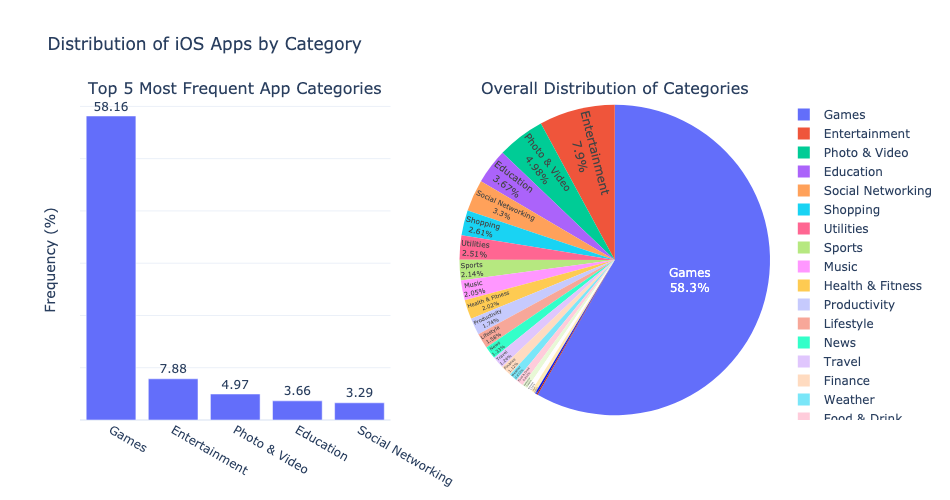

In [27]:
show_visuals(apple_free, 11, 'Top 5 Most Frequent App Categories', 
             'Overall Distribution of Categories',
            'Distribution of iOS Apps by Category',
            'Frequency (%)')

#### Observations: 
More than half **(58.16%)** of the free English Apps in the iOS store are Games. Entertainment apps constitute about **8%**, while Photo and video apps comprise almost **5%**. Only **3.66%** of these apps are designed for Education, and Social networking apps account for **3.29%** of the apps in our data set.

We can infer that the free English Apps segment of the iOS store is dominated by apps that are made for fun (games, entertainment, photo and video, social networking, sports, music, etc.). Practical purpose apps like (education, shopping, utilities, productivity, lifestyle, etc.) are relatively rare. 

However, **we cannot recommend** an app profile for the App Store market based on this information alone. The fact that there is a large proportion of fun apps does not imply that they also have the greatest number of users — The supply of these apps may not neccessarily correlate with their demand.

Lets also examine the `Category` and `Genres` columns of the google apps data set (two columns which seem to be related). The indices of the columns are 1 and 9 respectively:

FAMILY :  18.91
GAME :  9.72
TOOLS :  8.46
BUSINESS :  4.59
LIFESTYLE :  3.9
PRODUCTIVITY :  3.89
FINANCE :  3.7
MEDICAL :  3.53
SPORTS :  3.4
PERSONALIZATION :  3.32
COMMUNICATION :  3.24
HEALTH_AND_FITNESS :  3.08
PHOTOGRAPHY :  2.94
NEWS_AND_MAGAZINES :  2.8
SOCIAL :  2.66
TRAVEL_AND_LOCAL :  2.34
SHOPPING :  2.25
BOOKS_AND_REFERENCE :  2.14
DATING :  1.86
VIDEO_PLAYERS :  1.79
MAPS_AND_NAVIGATION :  1.4
FOOD_AND_DRINK :  1.24
EDUCATION :  1.16
ENTERTAINMENT :  0.96
LIBRARIES_AND_DEMO :  0.94
AUTO_AND_VEHICLES :  0.93
HOUSE_AND_HOME :  0.82
WEATHER :  0.8
EVENTS :  0.71
PARENTING :  0.65
ART_AND_DESIGN :  0.64
COMICS :  0.62
BEAUTY :  0.6


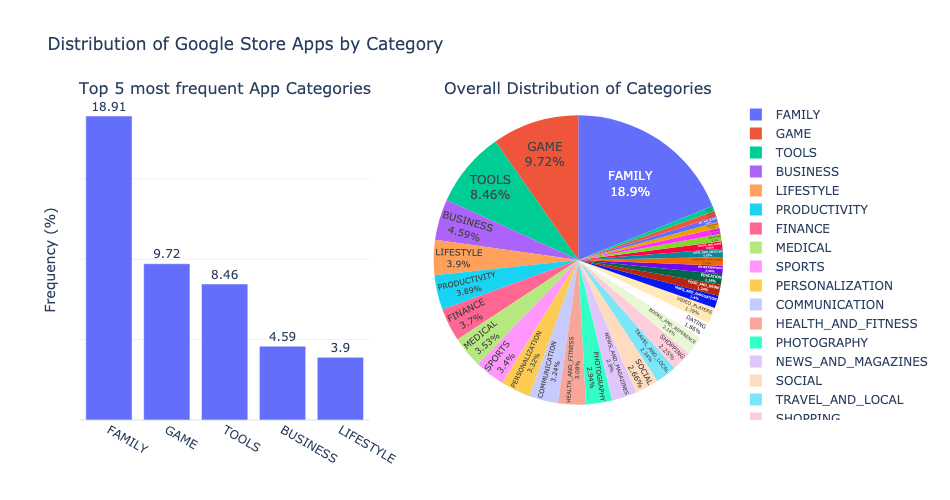

In [28]:
# compute frequency tables and display visuals for the google store 'Categories' column
show_visuals(google_free, 1, 'Top 5 most frequent App Categories', 
             'Overall Distribution of Categories',
            'Distribution of Google Store Apps by Category', 'Frequency (%)')

Things are significantly different on the Google Play Store: Asides video games, not many apps are designed for fun

It seems that a good number of free apps are designed for practical purposes (Family, Tools, Business, Lifestyle, Productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost **19%** of the apps) means mostly games for kids as shown by running the code block below:

In [29]:
wanted_rows = 15
for row in google_free:
    if row[1] == 'FAMILY':
        print(row[0])
        wanted_rows -=1
    
    if wanted_rows <= 0:
        break

Jewels Crush- Match 3 Puzzle
Coloring & Learn
Mahjong
Super ABC! Learning games for kids! Preschool apps
Toy Pop Cubes
Educational Games 4 Kids
Candy Pop Story
Princess Coloring Book
Hello Kitty Nail Salon
Candy Smash
Happy Fruits Bomb - Cube Blast
Princess Adventures Puzzles
Kids Educational Game 3 Free
Puzzle Kids - Animals Shapes and Jigsaw Puzzles
Coloring book moana


Even so, practical apps seem to have a better representation on Google Play compared to the iOS Store. This can be confirmed by computing a visual for the `Genres` column:

Tools :  8.45
Entertainment :  6.07
Education :  5.35
Business :  4.59
Productivity :  3.89
Lifestyle :  3.89
Finance :  3.7
Medical :  3.53
Sports :  3.46
Personalization :  3.32
Communication :  3.24
Action :  3.1
Health & Fitness :  3.08
Photography :  2.94
News & Magazines :  2.8
Social :  2.66
Travel & Local :  2.32
Shopping :  2.25
Books & Reference :  2.14
Simulation :  2.04
Dating :  1.86
Arcade :  1.85
Video Players & Editors :  1.77
Casual :  1.76
Maps & Navigation :  1.4
Food & Drink :  1.24
Puzzle :  1.13
Racing :  0.99
Role Playing :  0.94
Libraries & Demo :  0.94
Auto & Vehicles :  0.93
Strategy :  0.91
House & Home :  0.82
Weather :  0.8
Events :  0.71
Adventure :  0.68
Comics :  0.61
Beauty :  0.6
Art & Design :  0.6
Parenting :  0.5
Card :  0.45
Casino :  0.43
Trivia :  0.42
Educational;Education :  0.39
Board :  0.38
Educational :  0.37
Education;Education :  0.34
Word :  0.26
Casual;Pretend Play :  0.24
Music :  0.2
Racing;Action & Adventure :  0.17
Puzzle;Brain Game

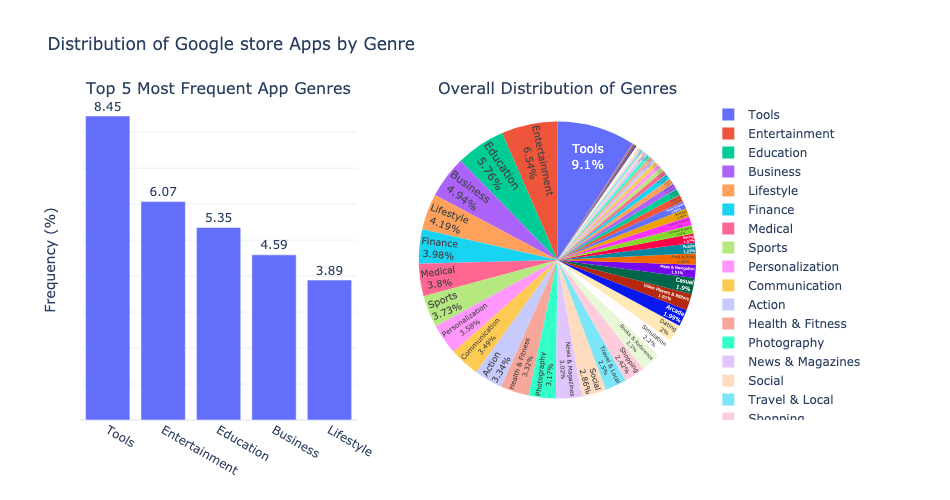

In [30]:
show_visuals(google_free, 9, 'Top 5 Most Frequent App Genres', 
             'Overall Distribution of Genres',
            'Distribution of Google store Apps by Genre', 'Frequency (%)')

We can immediately observe that while appearing to mean the same thing (definition wise), The `Genres` column is **much more detailed** than the `Category` column. Our interest is the bigger picture, so we'll only consider the `Category` column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have the most users

## Most Popular Apps by Genre on the iOS Store

One way to find out what genres are the most popular (have the most users) is to calculate the **average** number of installs for each app genre. For the Google Play data set, we can find this information in the `Installs` column, but this information is missing for the iOS Store data set. As a workaround, we'll consider the total number of user ratings instead, which we can find in the `rating_count_tot` column of the iOS dataset.

We will define a function below called `compute_average`. This function takes the dataset, and indices of the *categorical* and *measurement* variables that we want from the dataset. It then computes and returns a dictionary containing the results:

In [31]:
def compute_average(dataset, cat_index, m_index):
    '''Groups by cat_index, while computing the average of m_index. Returns result as a dictionary'''
    
    unique_dict = freq_table(dataset,cat_index)
    unique_arr = list(unique_dict.keys())
    result = {}
    
    for item in unique_arr:
        total, count = 0, 0

        for row in dataset:
            genre = row[cat_index]
            n_reviews = int(row[m_index])

            if item == genre:
                total+= n_reviews
                count +=1

        average = total/count
        result[item]= round(average,2)
        
    return result

Lets compute and visualize the average number of installs for each iOS App genre:

Navigation :  86090.33
Reference :  74942.11
Social Networking :  71548.35
Music :  57326.53
Weather :  52279.89
Book :  39758.5
Food & Drink :  33333.92
Finance :  31467.94
Photo & Video :  28441.54
Travel :  28243.8
Shopping :  26919.69
Health & Fitness :  23298.02
Sports :  23008.9
Games :  22788.67
News :  21248.02
Productivity :  21028.41
Utilities :  18684.46
Lifestyle :  16485.76
Entertainment :  14029.83
Business :  7491.12
Education :  7003.98
Catalogs :  4004.0
Medical :  612.0


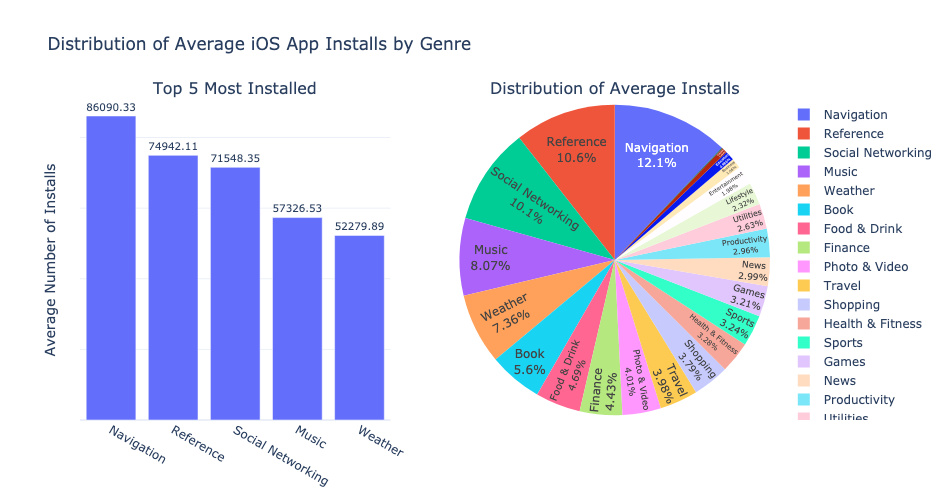

In [32]:
# compute the average installs for each iOS app genre
apple_abg = compute_average(apple_free, 11,5)

# display a visual of the computed averages
show_visuals(apple_abg, title_a = 'Top 5 Most Installed', 
             title_b = 'Distribution of Average Installs',
            main_title = 'Distribution of Average iOS App Installs by Genre',
            y_label = 'Average Number of Installs')

We can see that the top five iOS app Genres with the highest number of average installs are: Navigation, Refrence, Social Networking, Music and Weather. 

**Since we are dealing with averages, It will be advisable to probe into these categories more, just to be sure that there are no outliers overstating the average:**

In [33]:
for row in apple_free:
    if row[11] == 'Navigation':
        print(row[1], ': ', row[5])

Waze - GPS Navigation, Maps & Real-time Traffic :  345046
Google Maps - Navigation & Transit :  154911
Geocaching® :  12811
CoPilot GPS – Car Navigation & Offline Maps :  3582
ImmobilienScout24: Real Estate Search in Germany :  187
Railway Route Search :  5


It becomes immediately apparent that the high average we obtained for Navigation apps is occuring as a result of users downloading the essential navigation apps: *The Waze- GPS Maps and Google Maps*

Now, lets take a closer look into the reference category:

In [34]:
for row in apple_free:
    if row[11] == 'Reference':
        print(row[1], ': ', row[5])

Bible :  985920
Dictionary.com Dictionary & Thesaurus :  200047
Dictionary.com Dictionary & Thesaurus for iPad :  54175
Google Translate :  26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran :  18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition :  17588
Merriam-Webster Dictionary :  16849
Night Sky :  12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) :  8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools :  4693
GUNS MODS for Minecraft PC Edition - Mods Tools :  1497
Guides for Pokémon GO - Pokemon GO News and Cheats :  826
WWDC :  762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free :  718
VPN Express :  14
Real Bike Traffic Rider Virtual Reality Glasses :  8
教えて!goo :  0
Jishokun-Japanese English Dictionary & Translator :  0


Here we see that **there are more offerings that users are interacting with** ranging from Bibles and Qurans to dictionaries and Translation tools. There are some outliers here too (e.g The Bible and Dictionaries have considerably large amount of installs when compared to other apps within the same group).

Using an average will also cause inflated average values in the `Social networking` and `Music` categoories because there are large selection of popular apps within the Social (Facebook, Pinterest, Skype, Messenger) and Music (Pandora, Spotify, Shazam e.t.c) categories:

In [35]:
wanted_rows = 15
for row in apple_free:
    if row[11] == 'Social Networking':
        print(row[1], ': ', row[5])
        wanted_rows -=1
    
    if wanted_rows <= 0:
        break

Facebook :  2974676
Pinterest :  1061624
Skype for iPhone :  373519
Messenger :  351466
Tumblr :  334293
WhatsApp Messenger :  287589
Kik :  260965
ooVoo – Free Video Call, Text and Voice :  177501
TextNow - Unlimited Text + Calls :  164963
Viber Messenger – Text & Call :  164249
Followers - Social Analytics For Instagram :  112778
MeetMe - Chat and Meet New People :  97072
We Heart It - Fashion, wallpapers, quotes, tattoos :  90414
InsTrack for Instagram - Analytics Plus More :  85535
Tango - Free Video Call, Voice and Chat :  75412


In [36]:
wanted_rows = 15
for row in apple_free:
    if row[11] == 'Music':
        print(row[1], ': ', row[5])
        wanted_rows -=1
    
    if wanted_rows <= 0:
        break

Pandora - Music & Radio :  1126879
Spotify Music :  878563
Shazam - Discover music, artists, videos & lyrics :  402925
iHeartRadio – Free Music & Radio Stations :  293228
SoundCloud - Music & Audio :  135744
Magic Piano by Smule :  131695
Smule Sing! :  119316
TuneIn Radio - MLB NBA Audiobooks Podcasts Music :  110420
Amazon Music :  106235
SoundHound Song Search & Music Player :  82602
Sonos Controller :  48905
Bandsintown Concerts :  30845
Karaoke - Sing Karaoke, Unlimited Songs! :  28606
My Mixtapez Music :  26286
Sing Karaoke Songs Unlimited with StarMaker :  26227


## The Median As a Measure

In this case it would be advisable to use a better measure of central tendency - **The Median**

We will define a `compute_median()` function that performs essentially the same function as `compute_average()`, but uses the median instead of the mean as a statistic

In [37]:
def compute_median(dataset, cat_index, m_index):
    '''Groups by cat_index, while computing the median of m_index. Returns result as a dictionary'''
    
    unique_dict = freq_table(dataset,cat_index)
    unique_arr = list(unique_dict.keys())
    result = {}
    
    for item in unique_arr:
        value_set =[]

        for row in dataset:
            genre = row[cat_index]
            n_reviews = int(row[m_index])

            if item == genre:
                value_set.append(n_reviews)
        
        value_set = sorted(value_set)
        value_length = len(value_set)
        
        if value_length % 2 == 1:
            index = int((value_length - 1)/2)
            result[item]= value_set[index]
        else:
            index_a = int(value_length/2)
            index_b = int((value_length-2)/2)
            result[item] = (value_set[index_a] + value_set[index_b])/2
        
    return result

Now, we'll compute and visualize the median number of installs for each iOS App genre:

Productivity :  8737.5
Navigation :  8196.5
Reference :  6614.0
Shopping :  5936.0
Social Networking :  4199.0
Music :  3850.0
Health & Fitness :  2459
Photo & Video :  2206.0
Finance :  1931.0
Sports :  1628
Food & Drink :  1490.5
Catalogs :  1229.0
Entertainment :  1197.5
Business :  1150
Lifestyle :  1111
Utilities :  1110
Games :  901.5
Travel :  798.5
Education :  606.5
Medical :  566.5
Book :  421.5
News :  373
Weather :  289.0


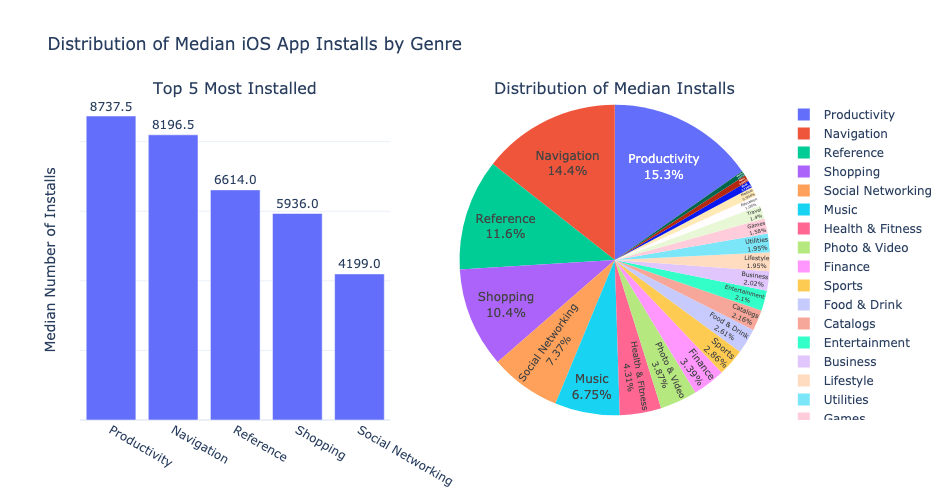

In [38]:
# compute the average installs for each iOS app genre
apple_med = compute_median(apple_free, 11,5)

# display a visual of the computed averages
show_visuals(apple_med, title_a = 'Top 5 Most Installed', 
             title_b = 'Distribution of Median Installs',
            main_title = 'Distribution of Median iOS App Installs by Genre',
            y_label = 'Median Number of Installs')

We see that the order has changed and the top 5 categories with the highest median installs are: Productivity, Navigation, Refrence, Shopping and Social Networking. 

From earlier observations, we have noticed some skew in the Navigation and Reference categories. However, we could explore the Productivity and Shopping sections in a bit more detail. Lets examine the top 15 productivity apps on the iOS store:

In [39]:
wanted_rows = 15
for row in apple_free:
    if row[11] == 'Productivity':
        print(row[1], ': ', row[5])
        wanted_rows -=1
    
    if wanted_rows <= 0:
        break

Evernote - stay organized :  161065
Gmail - email by Google: secure, fast & organized :  135962
iTranslate - Language Translator & Dictionary :  123215
Yahoo Mail - Keeps You Organized! :  113709
Google Docs :  64259
Google Drive - free online storage :  59255
Dropbox :  49578
Microsoft Word :  47999
Microsoft OneNote :  39638
Microsoft Outlook - email and calendar :  32807
Hotspot Shield Free VPN Proxy & Wi-Fi Privacy :  32499
Documents 6 - File manager, PDF reader and browser :  29110
Google Sheets :  24602
Microsoft Excel :  24430
Inbox by Gmail :  21561


This Productivity category shows a *relatively even* spread of installs. However, we need to be careful with our decision making. *I believe* that the worst time any user will want to see an ad is when they are trying to be productive or studying reference books like the Bible or Quran. As a result, we will err on the side of caution and not explore these categories further for now.

This leaves us with the Shopping category which we can explore further too. Let's print the top 15 Shopping apps in the iOS store:

In [40]:
wanted_rows = 15
for row in apple_free:
    if row[11] == 'Shopping':
        print(row[1], ': ', row[5])
        wanted_rows -=1
    
    if wanted_rows <= 0:
        break

Groupon - Deals, Coupons & Discount Shopping App :  417779
eBay: Best App to Buy, Sell, Save! Online Shopping :  262241
Wish - Shopping Made Fun :  141960
shopkick - Shopping Rewards & Discounts :  130823
Amazon App: shop, scan, compare, and read reviews :  126312
Target :  108131
Zappos: shop shoes & clothes, fast free shipping :  103655
Walgreens – Pharmacy, Photo, Coupons and Shopping :  88885
Best Buy :  80424
Walmart: Free 2-Day Shipping,* Easy Store Shopping :  70286
OfferUp - Buy. Sell. Simple. :  57348
Apple Store :  55171
Shop Savvy Barcode Scanner - Price Compare & Deals :  54630
Ibotta: Cash Back App, Grocery Coupons & Shopping :  44313
letgo: Buy & Sell Second Hand Stuff :  38424


## Wow! Shopping!!

We immediately notice that this category shows the far more even distribution of installs than the other categories we have explored, the outliers are relatively fewer too. The great news is: **Who does not want to see fun ads for things to buy when shopping?**

I am particularly less annoyed by ads in a shopping app than I would be if I saw the same ad when reading an E-Bible or E-Book. There are also lots of options we could explore further with shopping.

We could create an app that collates the deals of the day from the most popular online shopping platforms and display additional ads to users with minimal effort. Lets explore the google play dataset now shall we?

## Most Popular Apps by Genre on Google Play

Previously, we came up with an app profile recommendation for the iOS Store based on the distribution of user ratings. We have data about the number of installs for the Google Play market, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [41]:
show_goog = display_table(google_free, 5)

1,000,000+ :  15.73
100,000+ :  11.55
10,000,000+ :  10.55
10,000+ :  10.2
1,000+ :  8.39
100+ :  6.92
5,000,000+ :  6.83
500,000+ :  5.56
50,000+ :  4.77
5,000+ :  4.51
10+ :  3.54
500+ :  3.25
50,000,000+ :  2.3
100,000,000+ :  2.13
50+ :  1.92
5+ :  0.79
1+ :  0.51
500,000,000+ :  0.27
1,000,000,000+ :  0.23
0+ :  0.05
0 :  0.01


For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. 

To perform computations, however, we'll need to convert each install number from a string to a float. This means we need to remove the commas and the plus characters, or the conversion will fail and cause an error. We will do this using the `.replace()` method, then calculate the **average and median** number of installs per app genre for the Google Play dataset

In [42]:
temp = []

for row in google_free:
    n_installs = row[5]
    formatted_installs = n_installs.replace('+', '')
    formatted_installs = int(formatted_installs.replace(',', ''))
    row[5] = formatted_installs
    
    temp.append(row)
    
google_free = temp

COMMUNICATION :  38456119.17
VIDEO_PLAYERS :  24727872.45
SOCIAL :  23253652.13
PHOTOGRAPHY :  17840110.4
PRODUCTIVITY :  16787331.34
GAME :  15588015.6
TRAVEL_AND_LOCAL :  13984077.71
ENTERTAINMENT :  11640705.88
TOOLS :  10801391.3
NEWS_AND_MAGAZINES :  9549178.47
BOOKS_AND_REFERENCE :  8767811.89
SHOPPING :  7036877.31
PERSONALIZATION :  5201482.61
WEATHER :  5074486.2
HEALTH_AND_FITNESS :  4188821.99
MAPS_AND_NAVIGATION :  4056941.77
FAMILY :  3695641.82
SPORTS :  3638640.14
ART_AND_DESIGN :  1986335.09
FOOD_AND_DRINK :  1924897.74
EDUCATION :  1833495.15
BUSINESS :  1712290.15
LIFESTYLE :  1437816.27
FINANCE :  1387692.48
HOUSE_AND_HOME :  1331540.56
DATING :  854028.83
COMICS :  817657.27
AUTO_AND_VEHICLES :  647317.82
LIBRARIES_AND_DEMO :  638503.73
PARENTING :  542603.62
BEAUTY :  513151.89
EVENTS :  253542.22
MEDICAL :  120550.62


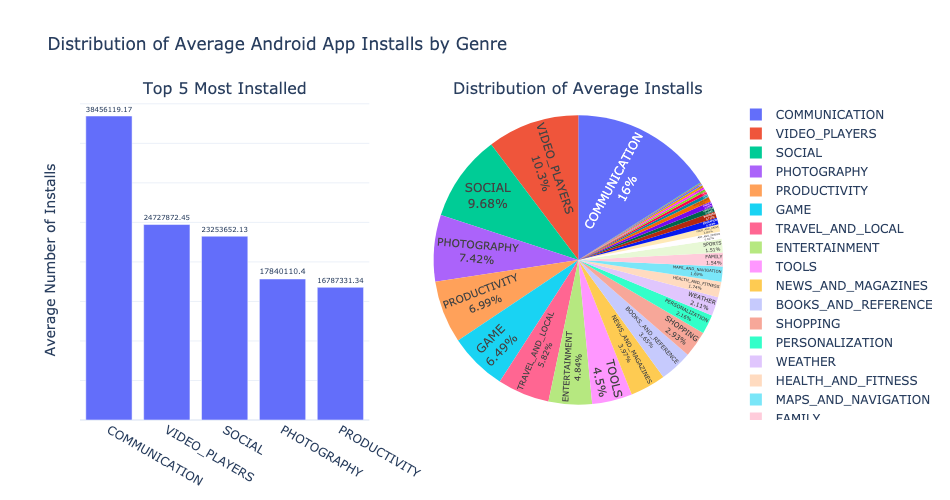

In [43]:
# compute the average installs for each iOS app genre
google_average = compute_average(google_free,1,5)

# display a visual of the computed averages
show_visuals(google_average, title_a = 'Top 5 Most Installed', 
             title_b = 'Distribution of Average Installs',
            main_title = 'Distribution of Average Android App Installs by Genre',
            y_label = 'Average Number of Installs')

On average, communication apps have the most installs: **38,456,119**. Video players follow with about **24,727,872** and Social apps with an average of approximately **23,253,652** installs. 

Since we are now aware of the possibility of outliers, we will probe into these categories further:

In [44]:
for row in google_free:
    if row[1] == 'COMMUNICATION' and row[5] >= 500000000:
        print(row[0], ': ', row[5])

WhatsApp Messenger :  1000000000
Google Duo - High Quality Video Calls :  500000000
Messenger – Text and Video Chat for Free :  1000000000
imo free video calls and chat :  500000000
Skype - free IM & video calls :  1000000000
LINE: Free Calls & Messages :  500000000
Google Chrome: Fast & Secure :  1000000000
UC Browser - Fast Download Private & Secure :  500000000
Gmail :  1000000000
Hangouts :  1000000000
Viber Messenger :  500000000


We can see the average for the Communication category is skewed up by a few apps that have over one billion installs (WhatsApp, Messenger, Skype, Google Chrome, Gmail, and Hangouts). We will even out this distribution using the median later. For now lets move on to the social category:

In [45]:
for row in google_free:
    if row[1] == 'SOCIAL' and row[5] >= 500000000:
        print(row[0], ': ', row[5])

Facebook :  1000000000
Facebook Lite :  500000000
Google+ :  1000000000
Instagram :  1000000000
Snapchat :  500000000


The Social category is also influenced by apps with huge download volumes like Facebook, Google, Instagram and Snapchat. 

Let's correct for these outliers using the median as a measure:

In [46]:
google_med = compute_median(google_free,1,5)
show_google_med = display_table(google_med, 5)

WEATHER :  1000000
VIDEO_PLAYERS :  1000000
SHOPPING :  1000000
PHOTOGRAPHY :  1000000
GAME :  1000000.0
ENTERTAINMENT :  1000000
EDUCATION :  1000000
HOUSE_AND_HOME :  500000
HEALTH_AND_FITNESS :  500000
FOOD_AND_DRINK :  500000.0
COMMUNICATION :  500000
TRAVEL_AND_LOCAL :  100000
TOOLS :  100000.0
SPORTS :  100000
SOCIAL :  100000.0
PRODUCTIVITY :  100000
PERSONALIZATION :  100000.0
PARENTING :  100000.0
MAPS_AND_NAVIGATION :  100000.0
FAMILY :  100000.0
COMICS :  100000
AUTO_AND_VEHICLES :  100000.0
ART_AND_DESIGN :  100000
NEWS_AND_MAGAZINES :  50000.0
BOOKS_AND_REFERENCE :  50000.0
BEAUTY :  50000
LIFESTYLE :  10000.0
LIBRARIES_AND_DEMO :  10000
FINANCE :  10000.0
DATING :  10000
MEDICAL :  1000
EVENTS :  1000
BUSINESS :  1000


Again we see that there is a redistribution of app categories: The Shopping category is now in the top 5 categories by median installs, Communication and Social apps are no longer present on the leaderboard. This is because the median has corrected for the outliers that could have misled us to assume that a higher sample of these apps were being downloaded by users in general.

We will briefly explore the Shopping category before making our conclusions:

In [47]:
for row in google_free:
    if row[1] == 'SHOPPING' and row[5] >= 500000000:
        print(row[0], ': ', row[5])

The code above did not return any output. This shows that there are no applications in this group with excessively huge downloads that could have skewed the average. On close observation, we will find that there is an interesting distribution of downloads for apps of this group. Most of the Shopping apps are successful in the google Play store with the values revolving around **1,000,000** downloads:

In [48]:
for row in google_free:
    if row[1] == 'SHOPPING':
        print(row[0], ': ', row[5])

Amazon for Tablets :  10000000
OfferUp - Buy. Sell. Offer Up :  10000000
Shopee - No. 1 Online Shopping :  10000000
Shopee: No.1 Online Shopping :  10000000
Kroger :  5000000
Walmart :  10000000
eBay: Buy & Sell this Summer - Discover Deals Now! :  100000000
letgo: Buy & Sell Used Stuff, Cars & Real Estate :  50000000
Amazon Shopping :  100000000
Lazada - Online Shopping & Deals :  50000000
OLX - Buy and Sell :  50000000
The wall :  1000000
Flipp - Weekly Shopping :  10000000
Shrimp skin shopping: spend less, buy better :  5000000
Lotte Home Shopping LOTTE Homeshopping :  5000000
Horn, free country requirements :  1000000
Jiji.ng :  1000000
GS SHOP :  10000000
The birth :  50000000
Home & Shopping - Only in apps. 10% off + 10% off :  10000000
EHS Dongsen Shopping :  1000000
bigbasket - online grocery :  5000000
Bukalapak - Buy and Sell Online :  10000000
Life market :  1000000
Jabong Online Shopping App :  10000000
Family Dollar :  1000000
Jumia online shopping :  10000000
Mercado Libr

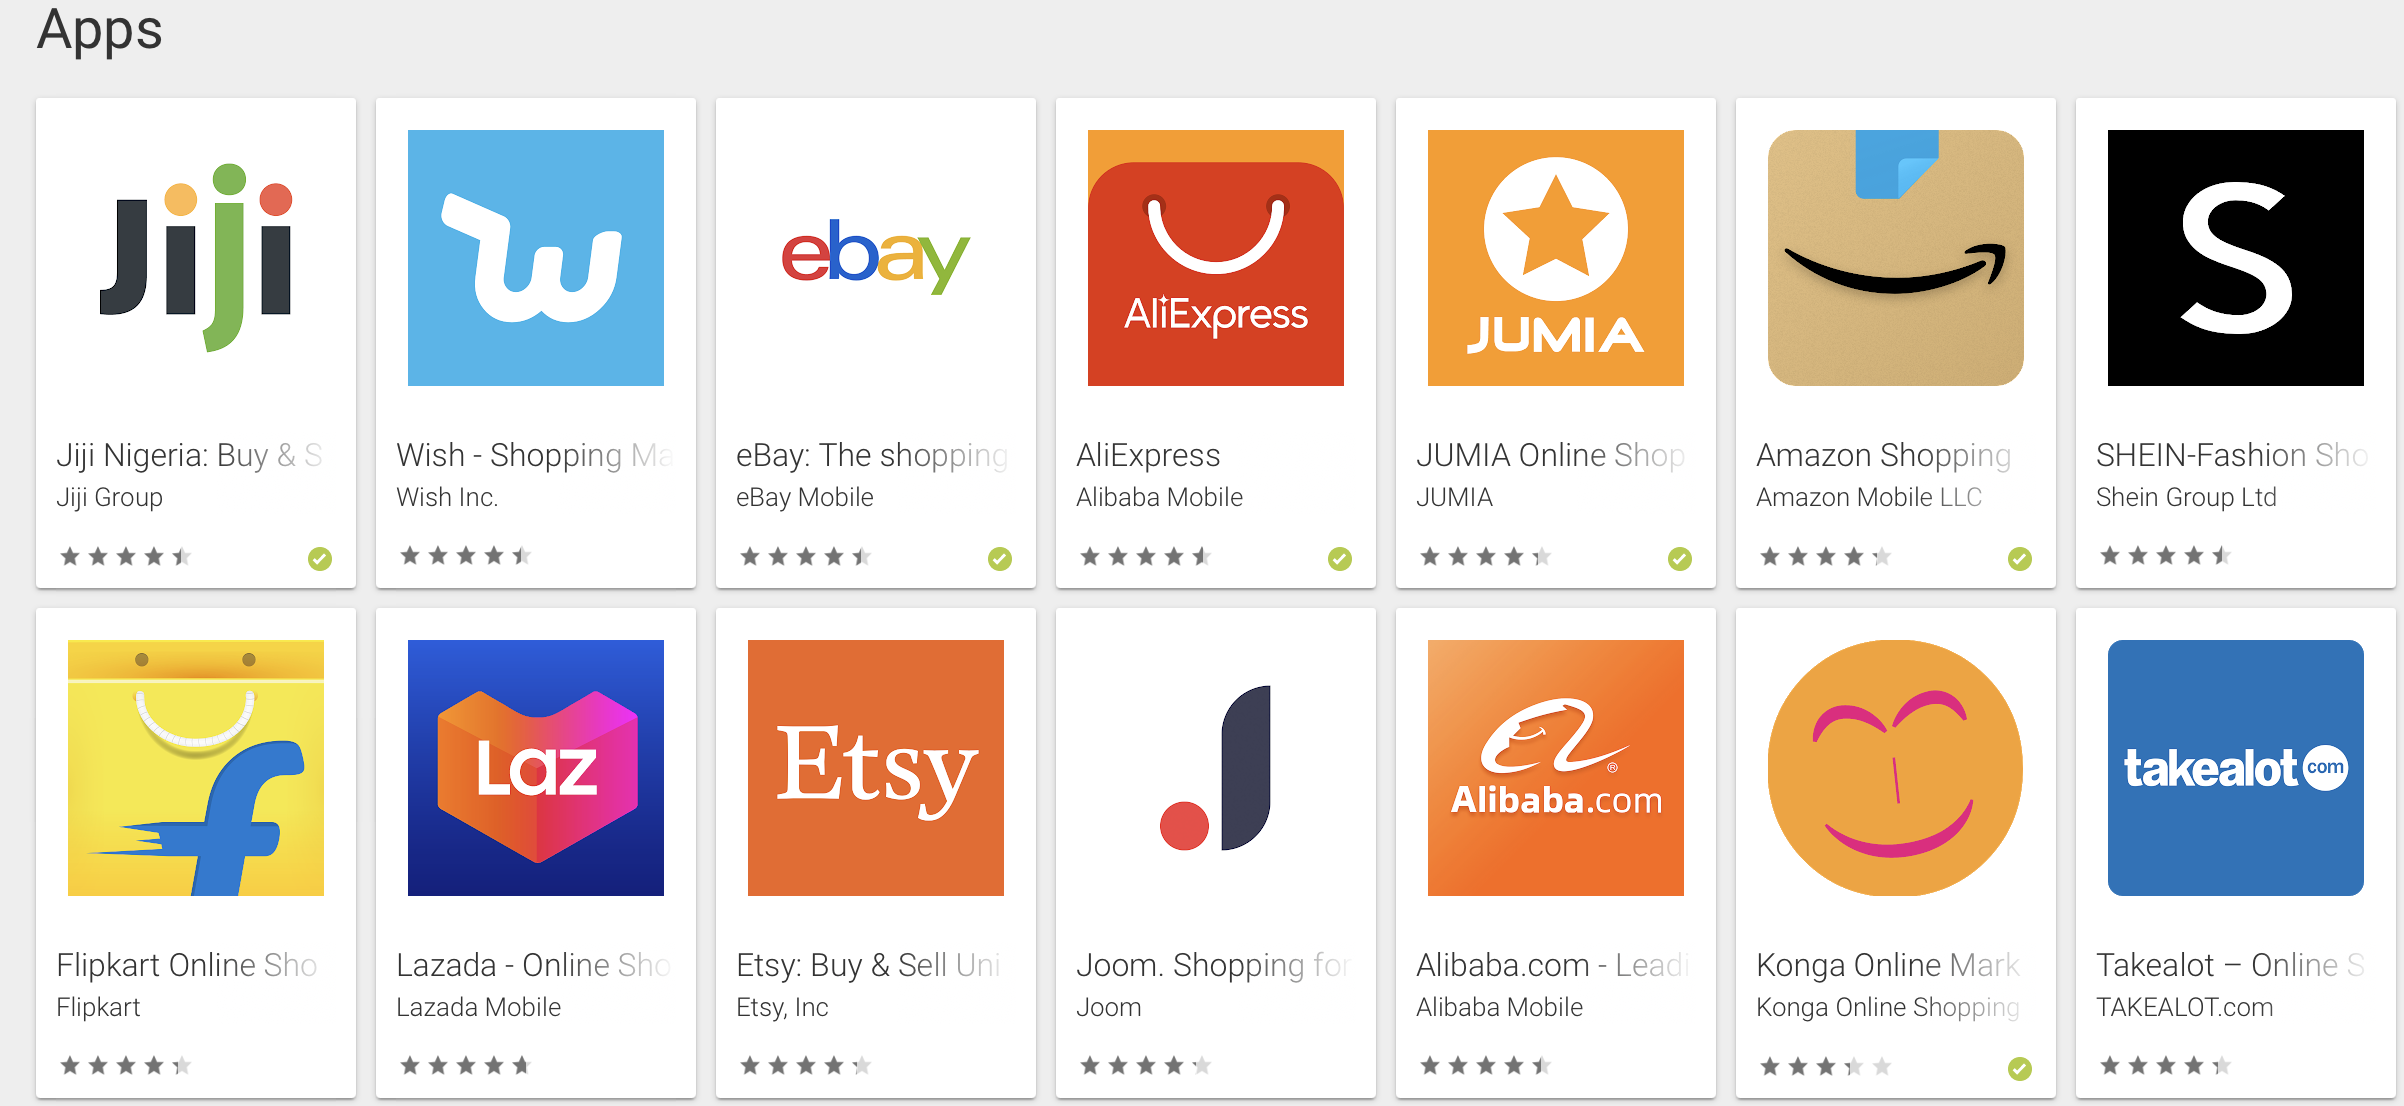
This category also appears to be dominated by software for online shopping. Despite the wide range of available options, outliers are much fewer here.

## Conclusion

In this project, we analyzed data about the iOS Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

After observing the even spread of user interatction with shopping apps in both stores, we concluded that it would valuable to build a Shopping app that tracks the top discount deals from various e-Commerce websites and other shopping platforms. Considering that ads, when done properly, can bring shoppers even closer to solutions (with less risks of annoying them), exploring this option will be of great benefit to us and our business goals.

## Prompts For future Exploration
If we could also make some additional revenue via in-app purchases and subscriptions in the future, what Genres or Categories of Apps should we consider?